# Univariate extreme value analysis using Pyextremes

This notebook illustrates how Pyextremes was used to provide results to the benchmark "Exercise 1". pyextremes implements both Peak Over Threshold and Block Maxima approach. For both approach, confidence intervals are calculated bootstrapping. 

In [1]:
import numpy as np
from pandas import pandas as pd
from matplotlib import pyplot as plt
from pyextremes import EVA

We start by reading the data, and performs the slight adjustment for pyextremes to work correctly: 

- time index should have a "datetype" type
- Value should be scaled to reasonable value for the MLE fit to properly converged. 

In [2]:
scale = 1000.
data = pd.read_hdf("../data/data_fp43.h5").iloc[:,0] / scale  # Results will be scaled back upon output

# Pyextremes requires "datetime" like input
data.index = pd.to_datetime( data.index.values,  unit='s') 

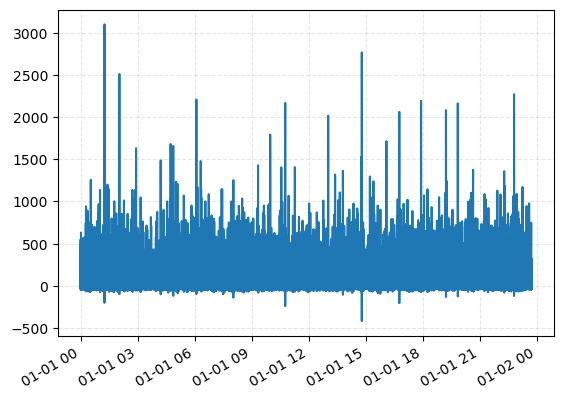

In [3]:
(scale*data).plot();

## Block maxima

In [4]:
block_size = 3500.

In [5]:
model = EVA(data=data)

In [6]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size=f"{block_size:}s",
    errors="raise",
)

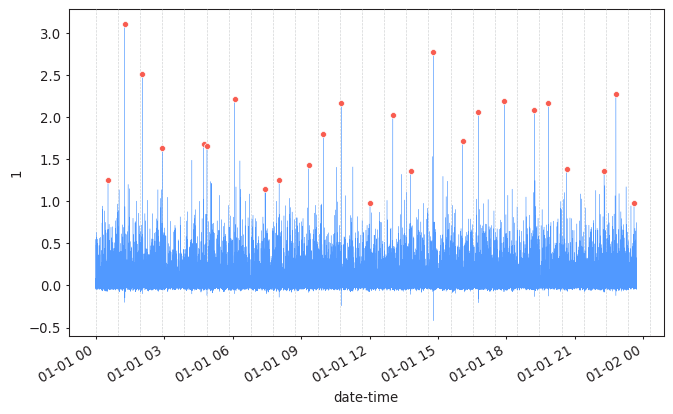

In [7]:
model.plot_extremes();

In [8]:
model.fit_model(distribution = "genextreme")
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                             1      Size:                          13,665,253
Start:                       January 1970      End:                         January 1970
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 25      Extraction method:                     BM
Type:                                high      Block size:               0 days 00:58:20
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

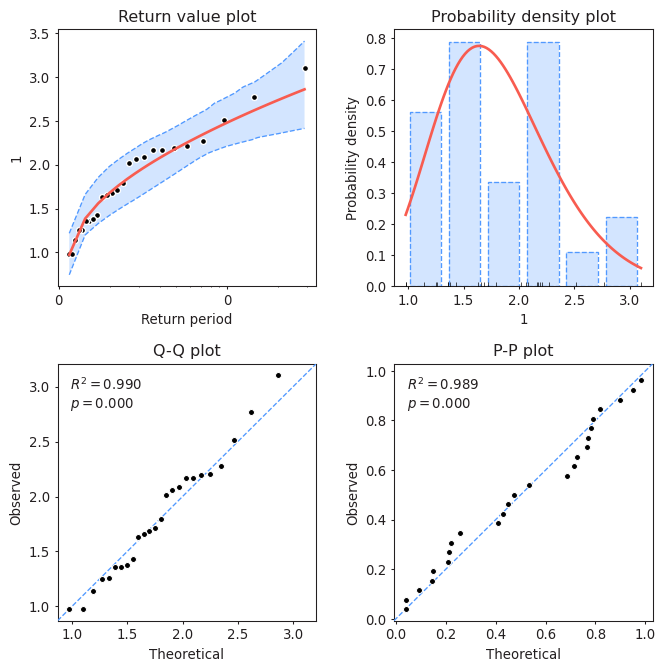

In [9]:
model.plot_diagnostic(alpha=0.95);

Store results to benchmark format

In [10]:
rp_range = np.logspace(4,6, 200)
rl, rl_low , rl_high  = model.get_return_value( rp_range, return_period_size='1s', alpha=0.95, n_samples = 1000)
pd.DataFrame(  data ={ "rp" :  rp_range, "return_value" : rl*scale , "ci_low" : rl_low*scale , "ci_high" : rl_high*scale} ).to_csv( "pyextremes_slamming_bm.csv", index = False )

## Peak Over Threshold

In [11]:
threshold = 1200. / scale
declustering_window = 100

(<Figure size 768x480 with 1 Axes>, <Axes: xlabel='date-time', ylabel='1'>)

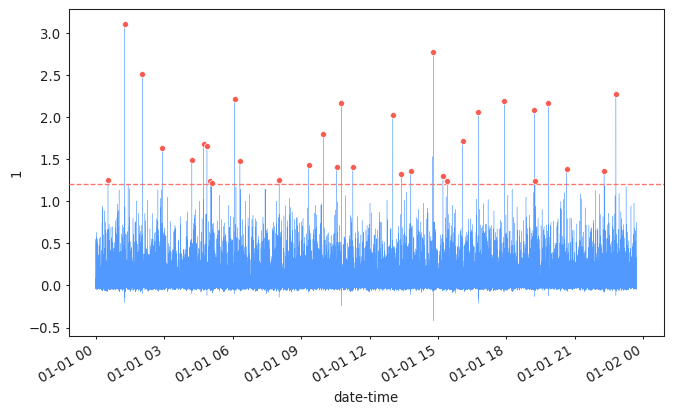

In [12]:
pot = EVA(data=data)

pot.get_extremes(
    method="POT",
    extremes_type="high",
    r=f"{declustering_window:}s",
    threshold=threshold,
)
pot.plot_extremes(show_clusters=False)

In [13]:
pot.fit_model(distribution = "genpareto")

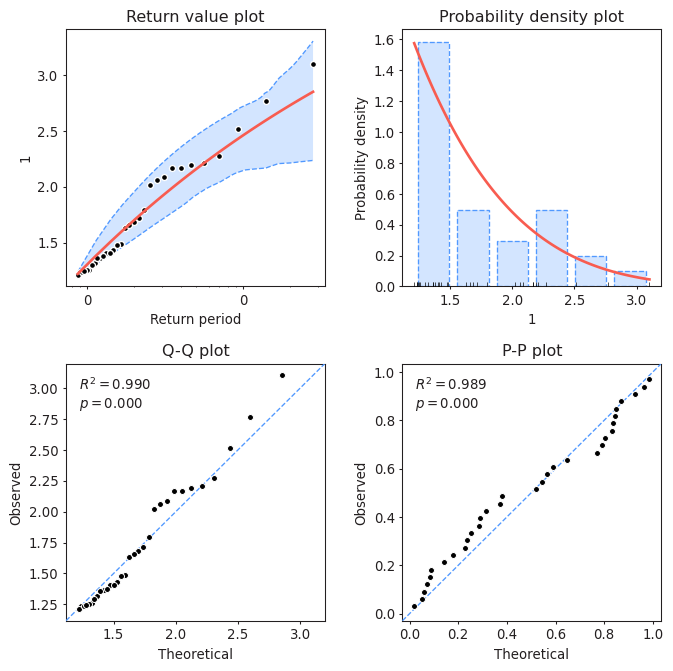

In [16]:
pot.plot_diagnostic(alpha = 0.95);

**Save data to the required benchmark format**

In [17]:
rp_range = np.logspace(4,6, 200)
rl, rl_low , rl_high  = pot.get_return_value( rp_range, return_period_size='1s', alpha=0.95)
pd.DataFrame(  data ={ "rp" :  rp_range, "return_value" : rl*scale , "ci_low" : rl_low*scale , "ci_high" : rl_high*scale} ).to_csv( "pyextremes_slamming_pot.csv", index = False )